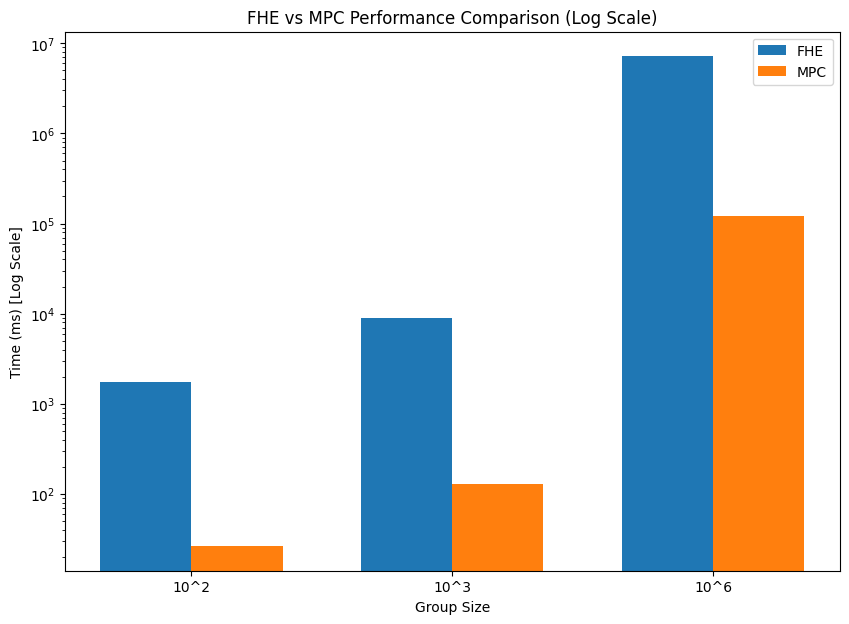

In [54]:
results_fhe = {"10^2":"/Users/riccardo/projects/monchichi/go/results/200_results.csv", "10^3": "/Users/riccardo/projects/monchichi/go/results/1000_results.csv", "10^6":"/Users/riccardo/projects/monchichi/go/results/1000000_results.csv"}
results_mpc = {"10^2": "/Users/riccardo/projects/monchichi/test_mpc/results/200_results.csv", "10^3": "/Users/riccardo/projects/monchichi/test_mpc/results/1000_results.csv", "10^6": "/Users/riccardo/projects/monchichi/test_mpc/results/1000000_results.csv"}
import pandas as pd
import matplotlib.pyplot as plt

# Function to convert results time (string) written in µs and s to ms
def convert_time(time):
    if "µs" in time:
        return float(time.replace("µs", "")) / 1000
    elif "ms" in time:
        return float(time.replace("ms", ""))
    elif "m" in time:
        return float(time.replace("m", "")) * 60000
    else:
        return float(time.replace("s", "")) * 1000

# Function to generate bar plots for the results using logarithmic scale
def generate_bar_plots_log(results_fhe, results_mpc):
    labels = []
    fhe_times = []
    mpc_times = []
    
    for key in results_fhe:
        # Read FHE results
        df_fhe = pd.read_csv(results_fhe[key])
        fhe_time = convert_time(df_fhe.iloc[-1][0])
        if key == "10^6":
            fhe_time = 7200000

        fhe_times.append(fhe_time)
        
        # Read MPC results
        df_mpc = pd.read_csv(results_mpc[key])
        mpc_time = convert_time(df_mpc.iloc[-1][0])
        if key == "10^6":
            mpc_time = 120000
        mpc_times.append(mpc_time)
        
        labels.append(key)

    x = range(len(labels))  # the label locations

    # Plotting
    fig, ax = plt.subplots(figsize=(10, 7))
    width = 0.35  # the width of the bars

    # Plot FHE bars with a logarithmic scale
    ax.bar(x, fhe_times, width, label='$\textsc{Monchi} + MFBR$')

    # Plot MPC bars next to FHE bars with a logarithmic scale
    ax.bar([i + width for i in x], mpc_times, width, label='$\textsc{Monchichi}$')

    # Use a logarithmic scale for the y-axis
    ax.set_yscale('log')

    # Add some text for labels, title, and custom x-axis tick labels
    ax.set_xlabel('Database Size')
    ax.set_ylabel('Time (ms)')
    ax.set_title('Performance Comparison (Log Scale)')
    ax.set_xticks([i + width / 2 for i in x])
    ax.set_xticklabels(labels)
    ax.legend()

    plt.show()

# Generate the plots with logarithmic scale
generate_bar_plots_log(results_fhe, results_mpc)



    #sum the 

1.751215409s
26.301675ms
[1751.2154090000001, 26.301675]
8.976436121s
127.906392ms
[8976.436121, 127.906392]
8.478416ms
2m22
[8.478416, 13320000.0]


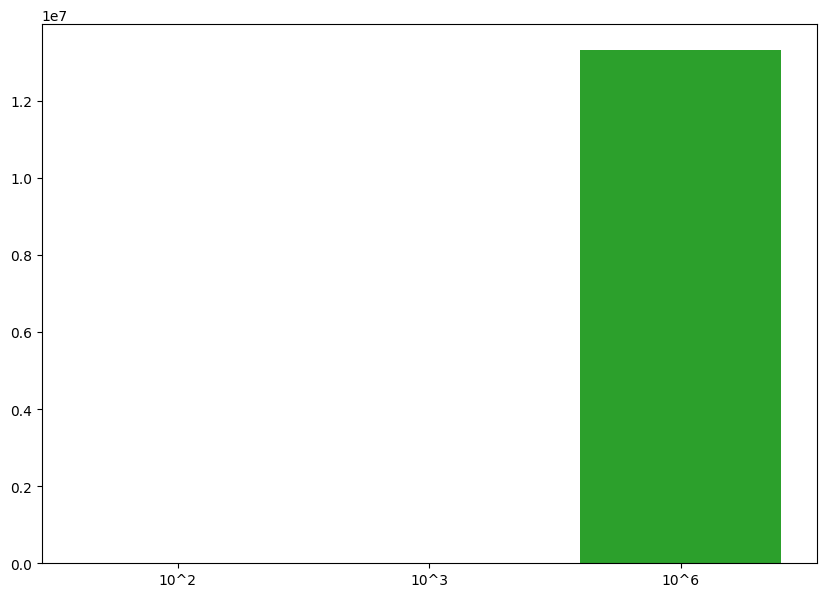

In [36]:
generate_box_plots(results_fhe, results_mpc)